# Trabajo Practico 01 - Fundamentos de Ciencia de Datos.
Estudiantes:

Donnarumma, César Julian

Longo, Bruno Iván

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Ejercicio 01:

## 1. Limpieza, transformacion y normalizacion de los datos:

### Primera exploracion:

In [ ]:
# Importacion de df recortando las 3 primeras filas, type str para primera vista, NaN values y delimitador
df = pd.read_csv("provicias_datos_2022.csv", dtype=str, na_values=['NaN',"nan"], skiprows=3, delimiter=";")

In [ ]:
# Se observa que hay valores nulos y los nombres de las columnas estan en algunos casos mal escritos y no siguen buenas practicas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   PROVINCIa                         24 non-null     object
 1   población (miles)                 23 non-null     object
 2   hogares (miles)                   24 non-null     object
 3   ingresos laborales (miles pesos)  23 non-null     object
 4   tasa de empleo (%)                24 non-null     object
 5   superficie (km2)                  24 non-null     object
 6   exportaciones (mill usd)          24 non-null     object
dtypes: object(7)
memory usage: 1.4+ KB


In [ ]:
# Se renombra cada una de las columnas de un modo mas adecuado
df = df.rename(columns={'PROVINCIa': 'Provincia', 'población (miles)': 'Poblacion (miles)', 'hogares (miles)': 'Hogares (miles)', 'ingresos laborales (miles pesos)': 'Ingresos laborales (miles pesos)', 'tasa de empleo (%)': 'Tasa de desempleo (%)', 'superficie (km2)': 'Superficie (km2)', 'exportaciones (mill usd)': 'Exportaciones (mill usd)'})

In [ ]:
# Se renombra la Ciudad Autonoma de Buenos Aires para visualizar mejor
df.loc[0, 'Provincia'] = "CABA"

In [ ]:
# Se rellenan los NaN con valor 0 para poder convertir luego las columnas a tipo int
df = df.fillna(value={'Poblacion (miles)': "0"})
df = df.fillna(value={'Ingresos laborales (miles pesos)': "0"})

### Cambios de tipo de datos:

In [ ]:
# En columna poblacion se eliminan los puntos y se convierte a int
df['Poblacion (miles)'] = df['Poblacion (miles)'].apply(lambda x: str(x).replace(".","")).astype(int)

In [ ]:
# En columna hogares se eliminan los puntos y se convierte a int
df['Hogares (miles)'] = df['Hogares (miles)'].apply(lambda x: str(x).replace(".","")).astype(int)

In [ ]:
# En columna ingresos laborales se eliminan los puntos y se convierte a int
df['Ingresos laborales (miles pesos)'] = df['Ingresos laborales (miles pesos)'].apply(lambda x: str(x).replace(".","")).astype(int)

In [ ]:
# En columna tasa de empleo se reemplazan las comas por puntos y se convierte a float
df['Tasa de desempleo (%)'] = df['Tasa de desempleo (%)'].apply(lambda x: str(x).replace(",",".")).astype(float)

In [ ]:
# En columna de superficies se reemplazan los puntos por nada, luego las comas por puntos, se convierte a float y se redondea
df['Superficie (km2)'] = df['Superficie (km2)'].apply(lambda x: str(x).replace(".","").replace(",",".")).astype(float)
df['Superficie (km2)'] = df['Superficie (km2)'].apply(lambda x: round(x))

In [ ]:
# En columna de superficies se reemplazan los comas por puntos, se convierte a float y se redondea
df['Exportaciones (mill usd)'] = df['Exportaciones (mill usd)'].apply(lambda x: str(x).replace(",",".")).astype(float)
df['Exportaciones (mill usd)'] = df['Exportaciones (mill usd)'].apply(lambda x: round(x))

### Rellenado de valores nulos:

Las columnas que tienen valores nulos son Poblacion e Ingresos laborales. Utilizaremos una matriz de correlaciones lineares para ver que variables son mejores para interpolar linealmente.

<ipython-input-522-e276b17655b3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


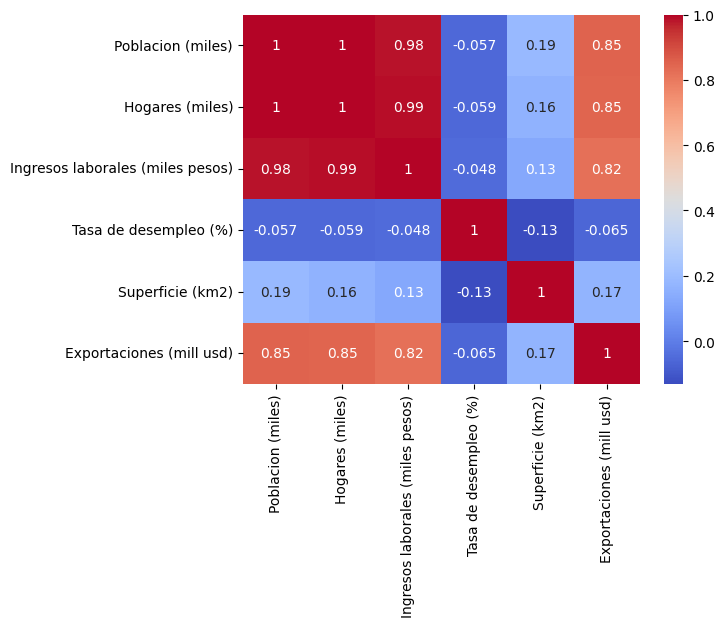

In [ ]:
# Grafico de matriz de correlaciones lineares:

corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

***Podemos notar correlación positiva fuerte entre las variables Hogares y Poblacion (Coef. = 1) y entre Hogares e Ingresos Laborales (Coef. 0.99). Utilizaremos esas relaciones para interpolar mas abajo.***

In [ ]:
# Funcion para interpolar linealmente
def interpolacion_lineal(valor_faltante, df_a_interpolar):
  columna_x = df_a_interpolar[ df_a_interpolar.columns[0] ].values.tolist()
  columna_y = df_a_interpolar[ df_a_interpolar.columns[1] ].values.tolist()
  return columna_y[columna_x.index(valor_faltante)-1] + (  (columna_y[columna_x.index(valor_faltante)+1] - columna_y[columna_x.index(valor_faltante)-1]) /  (columna_x[columna_x.index(valor_faltante)+1] - columna_x[columna_x.index(valor_faltante)-1])  )  *  (valor_faltante-columna_x[columna_x.index(valor_faltante)-1])

In [ ]:
# Rellenado de valor faltante con interpolacion en columna Poblacion:
df.loc[18, 'Poblacion (miles)'] = interpolacion_lineal(148, df[ ['Hogares (miles)', 'Poblacion (miles)']].sort_values('Hogares (miles)'))

In [ ]:
# Analogo con columna Ingresos:
df.loc[15, 'Ingresos laborales (miles pesos)'] = interpolacion_lineal(260, df[ ['Hogares (miles)', 'Ingresos laborales (miles pesos)']].sort_values('Hogares (miles)'))

In [ ]:
# No se aprecia correlación fuerte con otra variable para interpolar. Se asume error de tipeo:
df.loc[23, 'Tasa de desempleo (%)'] = 11

In [ ]:
# Ya se tienen los datos curados:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Provincia                         24 non-null     object 
 1   Poblacion (miles)                 24 non-null     int64  
 2   Hogares (miles)                   24 non-null     int64  
 3   Ingresos laborales (miles pesos)  24 non-null     float64
 4   Tasa de desempleo (%)             24 non-null     float64
 5   Superficie (km2)                  24 non-null     int64  
 6   Exportaciones (mill usd)          24 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 1.4+ KB


In [ ]:
# Se convierte columna ingresos laborales de miles de pesos a millones para que sea mas facil de visualizar ya
# que son numeros muy grandes y se modifica el nombre de la columna
df['Ingresos laborales (miles pesos)'] = df['Ingresos laborales (miles pesos)'].apply(lambda x : round(x / 1000))
df.rename(columns={'Ingresos laborales (miles pesos)': 'Ingresos laborales (mill pesos)'}, inplace=True)

### Importacion a formato .parquet:

In [ ]:
import pyarrow as pa
import pyarrow.parquet as pq
from google.colab import files

# Utilizamos pyarrow para escribir los datos en un archivo Parquet
provincias_df = pa.Table.from_pandas(df)
pq.write_table(provincias_df, 'provincias_df.parquet')

# Descargar el archivo Parquet (ejecutar la linea de abajo para descargarlo)
# files.download('provincias_df.parquet')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2. Exploracion de cada variables y busqueda de relaciones entre las mismas


### Distribuciones de variables por provincia:

Debido a que para las variable en general se tienen pocos datos, hacer una tabla con frecuencias absolutas no aportaria demasiada informacion ya que al ser pocos valores y ser el rango de las mismas demasiado grande las frecuencias darian todas 1 en gral. Se opta entonces por analizar las distribuciones de las mismas por provincia.

In [ ]:
# Variable: Poblacion

poblacion = df[ ['Provincia', 'Poblacion (miles)'] ].copy()
poblacion['Porcentaje de la poblacion total'] = poblacion['Poblacion (miles)'].apply(lambda x: round( (x / poblacion['Poblacion (miles)'].sum()) * 100, 2 ) )
poblacion = poblacion.sort_values('Poblacion (miles)', ascending = False).reset_index(drop = True)
print('Distribucion de la variable "Poblacion (miles)" por "Provincia"')
poblacion

Distribucion de la variable "Poblacion (miles)" por "Provincia"


,Provincia,Poblacion (miles),Porcentaje de la poblacion total
0,Buenos Aires,17292,40.86
1,Chaco,3477,8.22
2,Santa Fe,3311,7.82
3,CABA,3004,7.10
4,Mendoza,1668,3.94
5,Tucumán,1403,3.32
6,Salta,1307,3.09
7,Entre Ríos,1252,2.96
8,Córdoba,1044,2.47
9,Misiones,1003,2.37


In [ ]:
# Medidas de resumen de Poblacion:
poblacion['Poblacion (miles)'].describe()

count       24.000000
mean      1763.375000
std       3434.178439
min        172.000000
25%        509.000000
50%        714.500000
75%       1331.000000
max      17292.000000
Name: Poblacion (miles), dtype: float64

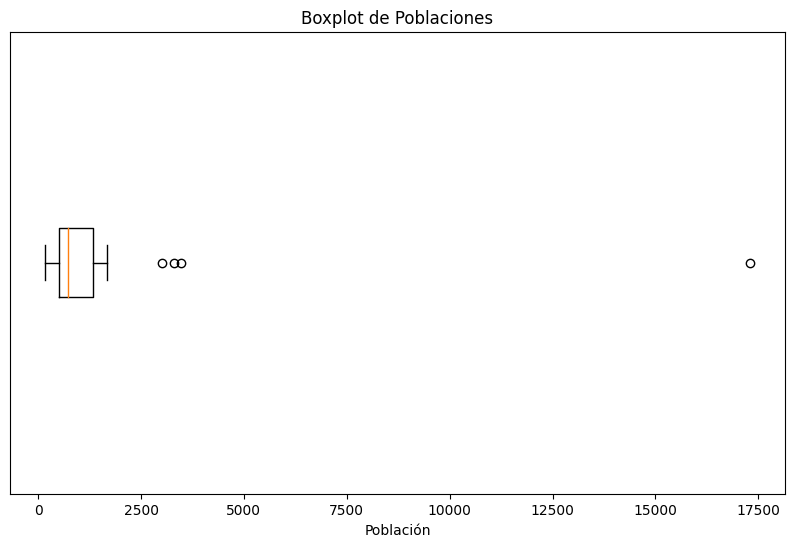

In [ ]:
# Boxplot de las poblaciones de las distintas provincias:

# Crea una figura con un tamaño personalizado
fig = plt.figure(figsize=(10, 6))

# Boxplot de las poblaciones
plt.boxplot(poblacion['Poblacion (miles)'], vert=False)

# Etiquetas
plt.title('Boxplot de Poblaciones')
plt.xlabel('Población')
plt.yticks([])

# Mostrar el gráfico
plt.show()

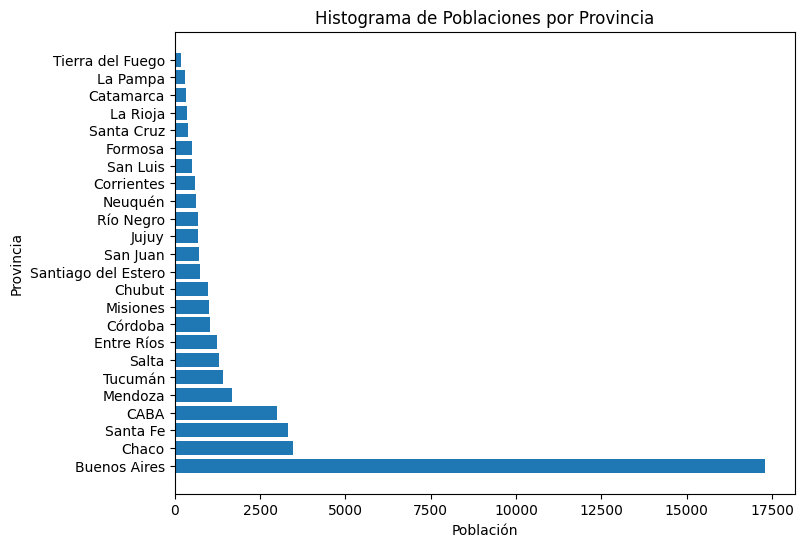

In [ ]:
# Histograma horizontal de las poblaciones de las distintas provincias:

# Crea una figura con un tamaño personalizado
fig = plt.figure(figsize=(8, 6))
plt.barh(poblacion['Provincia'], poblacion['Poblacion (miles)'])

# Etiquetas
plt.title('Histograma de Poblaciones por Provincia')
plt.xlabel('Población')
plt.ylabel('Provincia')

# Mostrar el gráfico
plt.show()

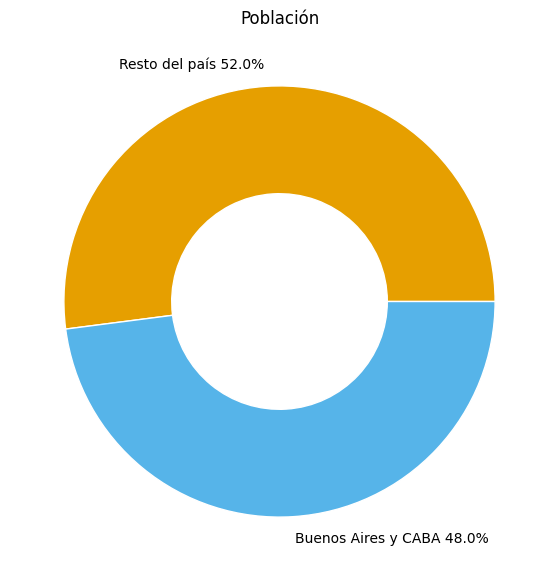

In [ ]:
# Grafico de dona de proporciones:

# Define los datos para el gráfico
numeros = [df['Poblacion (miles)'].sum() - df['Poblacion (miles)'][0] - df['Poblacion (miles)'][1], df['Poblacion (miles)'][0] + df['Poblacion (miles)'][1]]
etiquetas = ['Resto del país', 'Buenos Aires y CABA']
colores = ['#E69F00', '#56B4E9']

# Calcula los valores porcentuales
total = sum(numeros)
porcentajes = [100 * num / total for num in numeros]

# Crea el gráfico de dona
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(numeros, labels=['{} {:.1f}%'.format(etiqueta, porcentaje) for etiqueta, porcentaje in zip(etiquetas, porcentajes)], colors=colores, wedgeprops={'width': 0.5, 'edgecolor': 'white'})

# Agrega un círculo en el centro para crear el efecto de donut
my_circle = plt.Circle((0, 0), 0.3, color='white')
fig.gca().add_artist(my_circle)

# Agrega un título
plt.title('Población')

# Muestra el gráfico
plt.show()

Algunas aspectos llamativos del analisis de la variable poblacion respecto a las provincias y los graficos:

- Del analisis del boxplot y las medidas resumen se puede observar que el 75% de las provincias tienen hasta 1331 de poblacion y el 25% restante tienen desde ese valor hasta 17292, el maximo.

- De ese 25% restante de provincias se encuentran 4 que serian valores atipicos Chaco, Santa Fe, CABA y Buenos Aires que se destaca demasiado sobre las demas por su elevada poblacion.

- Observando la tabla de porcentajes de poblacion y tambien en referencia a lo anterior dicho se desprende que Buenos Aires solo concentra el 40.78 % de la poblacion o lo que es lo mismo la suma de las poblaciones del resto de provincias es igual al 59.22 %.


In [ ]:
# Variable: Superficie

superficie = df[ ['Provincia', 'Superficie (km2)'] ].copy()
superficie['Porcentaje del total de Superficie'] = superficie['Superficie (km2)'].apply(lambda x: round( (x / superficie['Superficie (km2)'].sum()) * 100, 2 ) )
superficie = superficie.sort_values('Superficie (km2)', ascending = False).reset_index(drop = True)
print('Distribucion de la variable "Superficie (km2)" por "Provincia"')
superficie

Distribucion de la variable "Superficie (km2)" por "Provincia"


,Provincia,Superficie (km2),Porcentaje del total de Superficie
0,Tucumán,910324,24.81
1,Buenos Aires,305907,8.34
2,Santa Cruz,244458,6.66
3,Chubut,224302,6.11
4,Río Negro,202169,5.51
5,Córdoba,164708,4.49
6,Salta,155340,4.23
7,Mendoza,149069,4.06
8,La Pampa,143492,3.91
9,Santiago del Estero,136934,3.73


In [ ]:
# Medidas de resumen de Superficie:
superficie['Superficie (km2)'].describe()

count        24.000000
mean     152904.500000
std      176648.989944
min         206.000000
25%       77660.000000
50%      100624.500000
75%      157682.000000
max      910324.000000
Name: Superficie (km2), dtype: float64

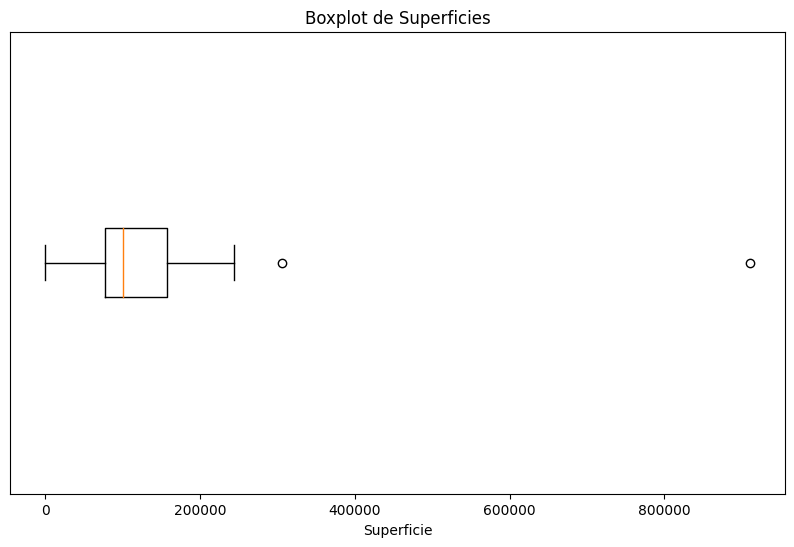

In [ ]:
# Boxplot de las superficies de las provincias

# Crea una figura con un tamaño personalizado
fig = plt.figure(figsize=(10, 6))
plt.boxplot(superficie['Superficie (km2)'], vert=False)

# Etiquetas
plt.title('Boxplot de Superficies')
plt.xlabel('Superficie')
plt.yticks([])

# Mostrar el gráfico
plt.show()

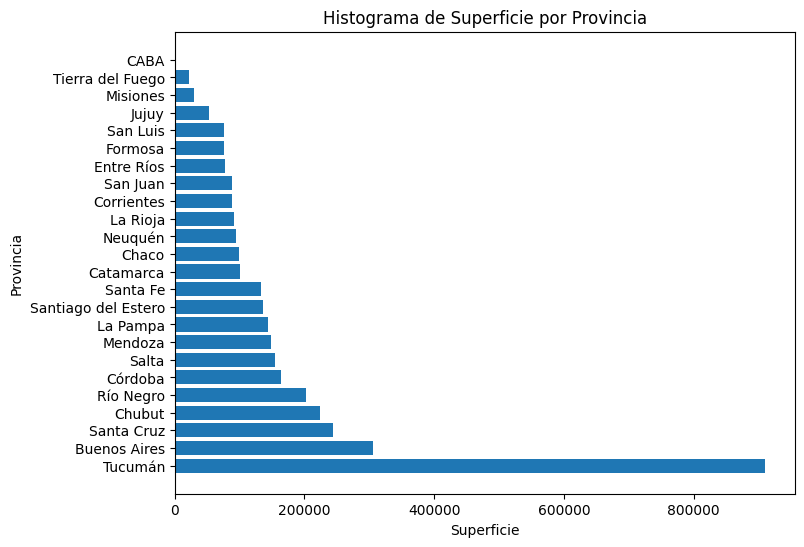

In [ ]:
# Histograma horizontal de las superficies en las distintas provincias.

# Crea una figura con un tamaño personalizado
fig = plt.figure(figsize=(8, 6))
plt.barh(superficie['Provincia'], superficie['Superficie (km2)'])

# Etiquetas
plt.title('Histograma de Superficie por Provincia')
plt.xlabel('Superficie')
plt.ylabel('Provincia')

# Mostrar el gráfico
plt.show()

Algunas aspectos llamativos del analisis de la variable superficie respecto a las provincias y los graficos:

- Se pueden observar dos valores atipicos que corresponden a Tucuman y Buenos Aires. Hasta los 250000 km2 aproximadamente se encuentran dispersos todos los valores a excepcion de estos dos, que se encuentran demasiado dispersos en un intervalo con una amplitud que va desde los 25000 hasta el valor de Tucuman que es el maximo con 910324 km2.

- En relacion a la proporcion de la superficie Tucuman concentra el 24.81% de la totalidad.

In [ ]:
# Variable: Exportaciones

exportaciones = df[ ['Provincia', 'Exportaciones (mill usd)'] ].copy()
exportaciones['Porcentaje del total de Exportaciones'] = exportaciones['Exportaciones (mill usd)'].apply(lambda x: round( (x / exportaciones['Exportaciones (mill usd)'].sum()) * 100, 2 ) )
exportaciones = exportaciones.sort_values('Exportaciones (mill usd)', ascending = False).reset_index(drop = True)
print('Distribucion de la variable "Exportaciones (mill usd)" por "Provincia"')
exportaciones

Distribucion de la variable "Exportaciones (mill usd)" por "Provincia"


,Provincia,Exportaciones (mill usd),Porcentaje del total de Exportaciones
0,Buenos Aires,33025,37.94
1,Santa Fe,19163,22.02
2,Córdoba,12852,14.77
3,Neuquén,2912,3.35
4,Chubut,2575,2.96
5,Santa Cruz,2242,2.58
6,Entre Ríos,1912,2.20
7,Mendoza,1601,1.84
8,Santiago del Estero,1545,1.78
9,Salta,1327,1.52


In [ ]:
# Medidas de resumen de Exportaciones:
df['Exportaciones (mill usd)'].describe()

count       24.000000
mean      3626.625000
std       7644.855325
min         41.000000
25%        424.250000
50%       1058.500000
75%       1994.500000
max      33025.000000
Name: Exportaciones (mill usd), dtype: float64

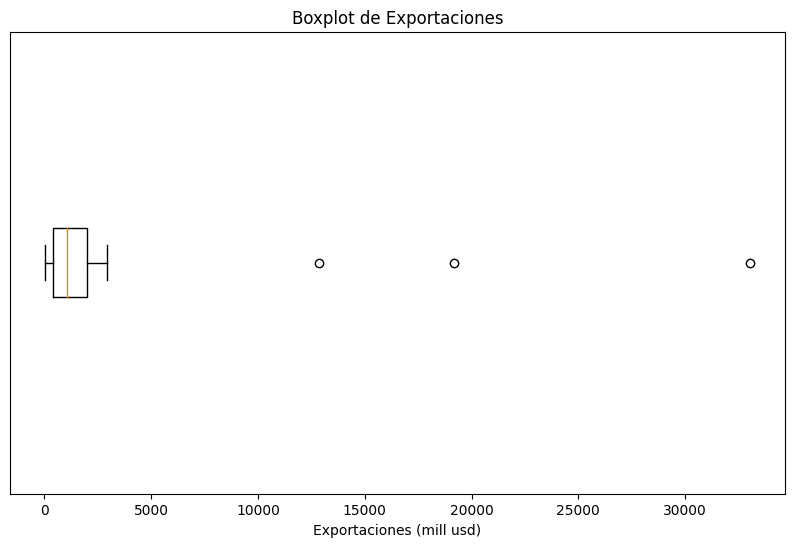

In [ ]:
# Boxplot de las exportaciones de las provincias (sin Bs As)

# Crea una figura con un tamaño personalizado
fig = plt.figure(figsize=(10, 6))
plt.boxplot(exportaciones['Exportaciones (mill usd)'], vert=False)

# Etiquetas
plt.title('Boxplot de Exportaciones')
plt.xlabel('Exportaciones (mill usd)')
plt.yticks([])

# Mostrar el gráfico
plt.show()

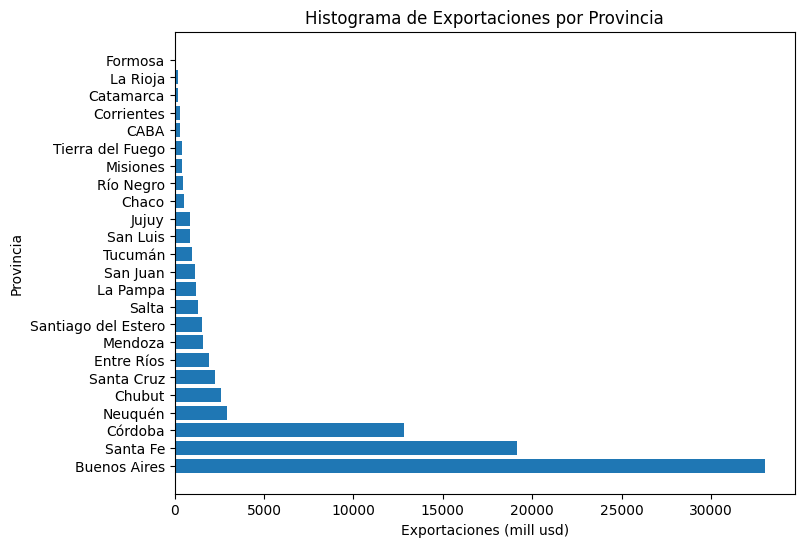

In [ ]:
# Histograma horizontal de las exportaciones en las distintas provincias.

# Crea una figura con un tamaño personalizado
fig = plt.figure(figsize=(8, 6))
plt.barh(exportaciones['Provincia'], exportaciones['Exportaciones (mill usd)'])

# Etiquetas
plt.title('Histograma de Exportaciones por Provincia')
plt.xlabel('Exportaciones (mill usd)')
plt.ylabel('Provincia')

# Mostrar el gráfico
plt.show()

Aspectos llamativos del analisis de la variable exportaciones respecto a las provincias y los graficos:

- En el boxplot se vuelve a observar un rango enorme, con 3 valores atipicos, Cordoba, Santa Fe y Buenos Aires, que destacan demasiado sobre el resto.

- En termino de proporciones las 3 provincias que componen los valores atipicos acumulan el 7473% de las exportaciones dejando a la suma de las restantes 21 en el 25.27%.

- Buenos Aires vuelve a destacar nuevamente como el maximo con 33025 millones de USD en exportaciones.

In [ ]:
# Variable: Ingresos laborales

ingresos_laborales = df[ ['Provincia', 'Ingresos laborales (mill pesos)'] ].copy()
ingresos_laborales['Porcentaje del total de Ingresos laborales'] = ingresos_laborales['Ingresos laborales (mill pesos)'].apply(lambda x: round( (x / ingresos_laborales['Ingresos laborales (mill pesos)'].sum()) * 100, 2 ) )
ingresos_laborales = ingresos_laborales.sort_values('Ingresos laborales (mill pesos)', ascending = False).reset_index(drop = True)
print('Distribucion de la variable "Ingresos laborales (mill pesos)" por "Provincia"')
ingresos_laborales

Distribucion de la variable "Ingresos laborales (mill pesos)" por "Provincia"


,Provincia,Ingresos laborales (mill pesos),Porcentaje del total de Ingresos laborales
0,Buenos Aires,623251,40.14
1,CABA,211877,13.65
2,Santa Fe,135662,8.74
3,Chaco,122790,7.91
4,Mendoza,51306,3.30
5,Entre Ríos,40510,2.61
6,Tucumán,34757,2.24
7,Salta,33247,2.14
8,Corrientes,30606,1.97
9,Misiones,29639,1.91


In [ ]:
# Medidas de resumen de Ingresos laborales:
ingresos_laborales['Ingresos laborales (mill pesos)'].describe()

count        24.000000
mean      64688.458333
std      128436.902167
min        8461.000000
25%       15893.000000
50%       23885.500000
75%       36195.250000
max      623251.000000
Name: Ingresos laborales (mill pesos), dtype: float64

In [ ]:
rango = ingresos_laborales['Ingresos laborales (mill pesos)'].max() - ingresos_laborales['Ingresos laborales (mill pesos)'].min()
rango

614790

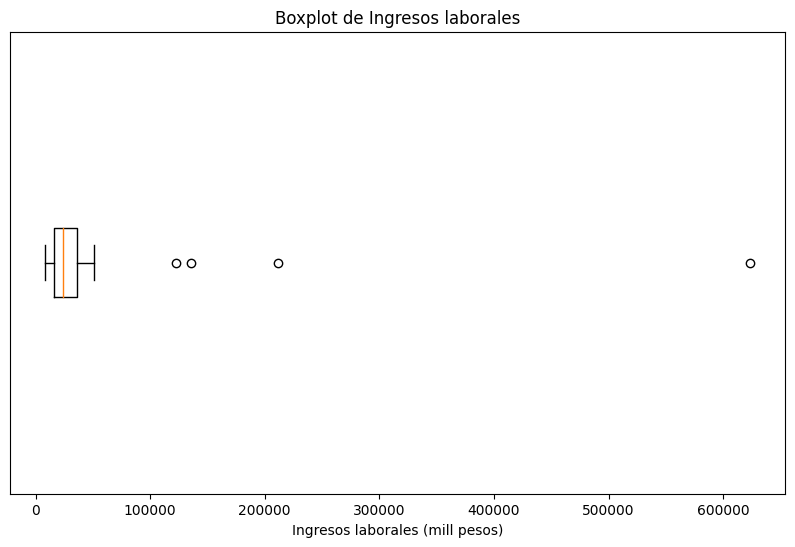

In [ ]:
# Boxplot de los Ingresos laborales de las provincias:

# Crea una figura con un tamaño personalizado
fig = plt.figure(figsize=(10, 6))
plt.boxplot(ingresos_laborales['Ingresos laborales (mill pesos)'], vert=False)

# Etiquetas
plt.title('Boxplot de Ingresos laborales')
plt.xlabel('Ingresos laborales (mill pesos)')
plt.yticks([])

# Mostrar el gráfico
plt.show()

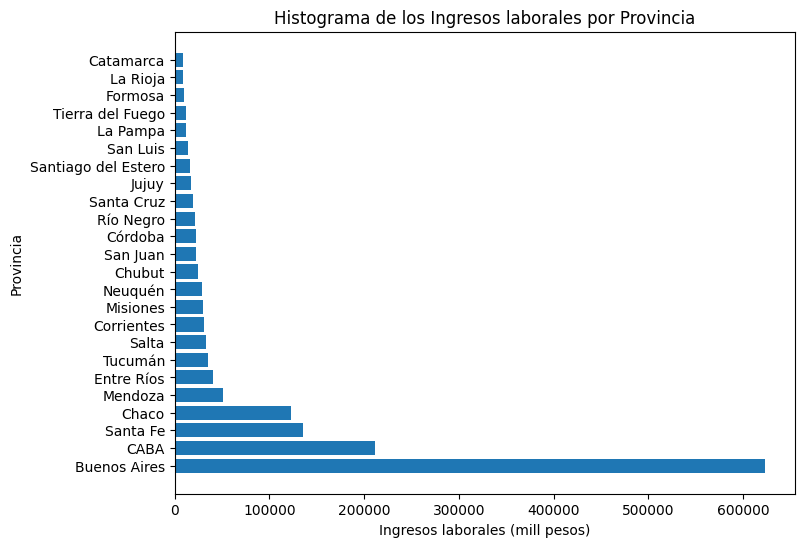

In [ ]:
# Histograma horizontal de las exportaciones en las distintas provincias.

# Crea una figura con un tamaño personalizado
fig = plt.figure(figsize=(8, 6))
plt.barh(ingresos_laborales['Provincia'], ingresos_laborales['Ingresos laborales (mill pesos)'])

# Etiquetas
plt.title('Histograma de los Ingresos laborales por Provincia')
plt.xlabel('Ingresos laborales (mill pesos)')
plt.ylabel('Provincia')

# Mostrar el gráfico
plt.show()

Aspectos llamativos del analisis de la variable ingresos laborales respecto a las provincias y los graficos:

- Otra vez mas se ve una gran dispersion de los datos, ubicados en un rango de 614790 millones de pesos, pero el 75% de los valores concentrados hasta los 36195 millones.

- Se presentan 4 valores atipicos, correspondientes a Chaco, Santa Fe, CABA y Buenos Aires, destacando nuevamente Buenos Aires como el maximo valor  y muy alejado incluso del anterior atipico.

- En terminos de proporciones Buenos Aires concentra  el 39.94 % de los ingresos, y la suma del resto representa el 60.06%.

### Relaciones entre variables

***Mas arriba en el grafico de la matriz de correlaciones lineales se pudo ver que existen correlaciones lineales entre fuertes entre varias columnas del dataframe. Poblacion/Hogares tienen un coeficiente de 1, Poblacion/Ingresos laborales 0.98, Poblacion/Exportaciones 0.85. Debido a que Poblacion y Hogares tienen como coeficiente 1, Hogares con el resto de variables compartira casi el mismo valor que Poblacion. Y por ultimo Exportaciones e Ingresos laborales con 0.82***

Graficos de dispersiones sin los 4 valores atipicos superiores (se omite graficar a Hogares porque sus correlaciones y sus graficos seran muy parecidas a las de Poblacion):

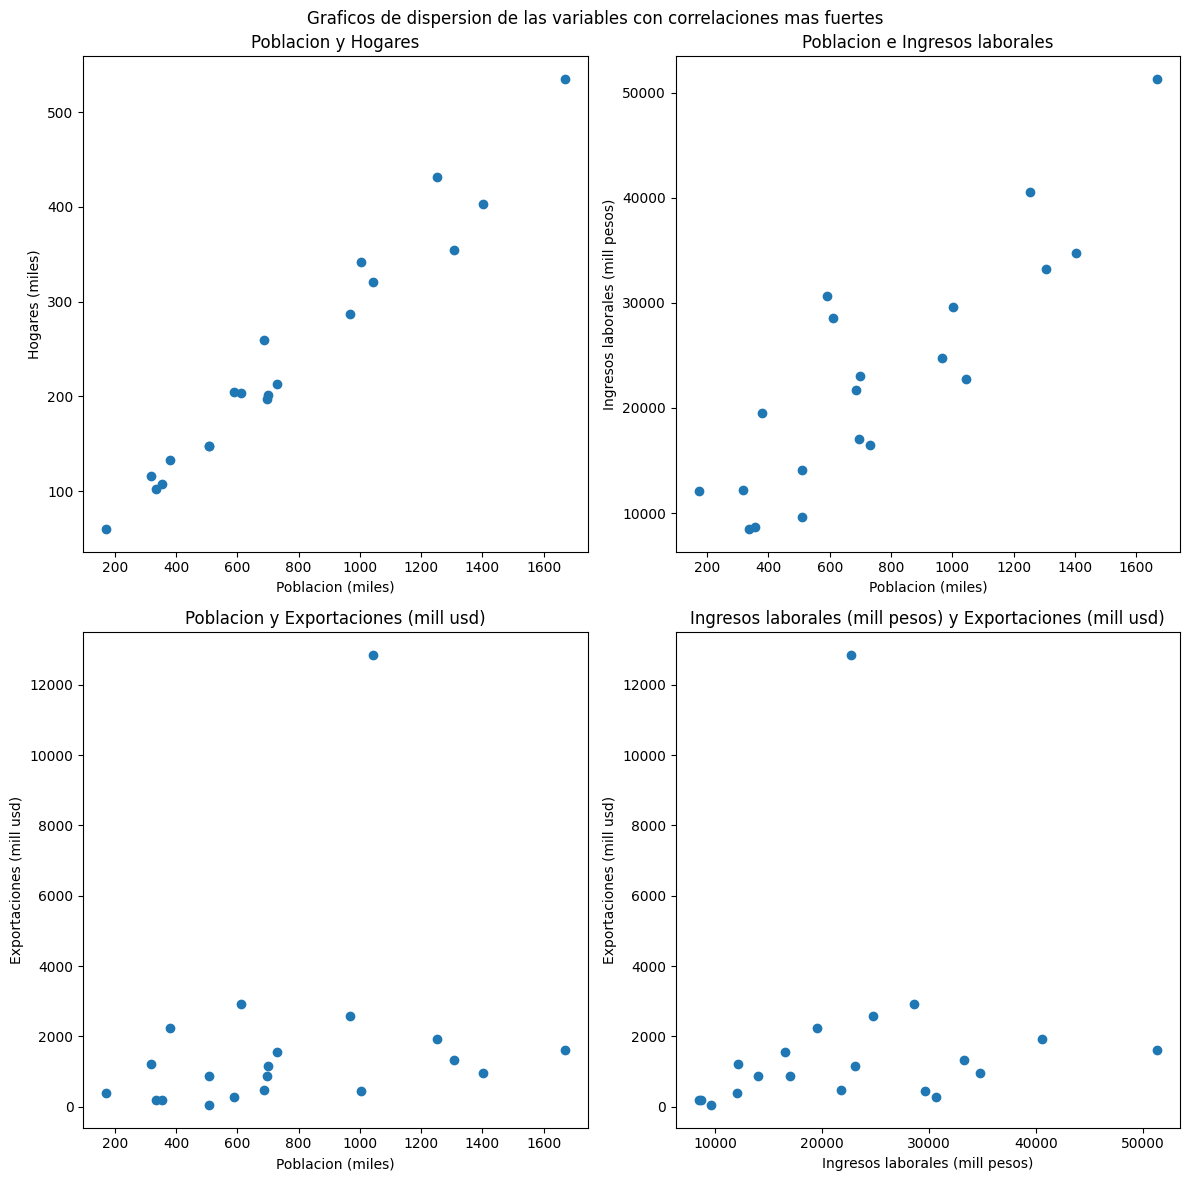

In [ ]:
# Mismo data frame pero ordenado por columna poblacion descendente. Se utilizara para graficar y quitar los valores
# atipicos de los graficos
df_ordenado = df.sort_values('Poblacion (miles)', ascending=False).reset_index(drop=True)

# Crea una figura con subplots en un diseño de 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Grafico de dispersión 1: Poblacion y Hogares
ax1 = axes[0, 0]
ax1.scatter(df_ordenado['Poblacion (miles)'][4:], df_ordenado['Hogares (miles)'][4:])
ax1.set_xlabel('Poblacion (miles)')
ax1.set_ylabel('Hogares (miles)')
ax1.set_title('Poblacion y Hogares')

# Grafico de dispersión 2: Poblacion y Ingresos laborales
ax2 = axes[0, 1]
ax2.scatter(df_ordenado['Poblacion (miles)'][4:], df_ordenado['Ingresos laborales (mill pesos)'][4:])
ax2.set_xlabel('Poblacion (miles)')
ax2.set_ylabel('Ingresos laborales (mill pesos)')
ax2.set_title('Poblacion e Ingresos laborales')

# Grafico de dispersión 3: Poblacion y Exportaciones
ax3 = axes[1, 0]
ax3.scatter(df_ordenado['Poblacion (miles)'][4:], df_ordenado['Exportaciones (mill usd)'][4:])
ax3.set_xlabel('Poblacion (miles)')
ax3.set_ylabel('Exportaciones (mill usd)')
ax3.set_title('Poblacion y Exportaciones (mill usd)')

# Grafico de dispersión 4: Importaciones y Exportaciones
ax4 = axes[1, 1]
ax4.scatter(df_ordenado['Ingresos laborales (mill pesos)'][4:], df_ordenado['Exportaciones (mill usd)'][4:])
ax4.set_xlabel('Ingresos laborales (mill pesos)')
ax4.set_ylabel('Exportaciones (mill usd)')
ax4.set_title('Ingresos laborales (mill pesos) y Exportaciones (mill usd)')

# Título general de la figura
fig.suptitle('Graficos de dispersion de las variables con correlaciones mas fuertes')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

##Conclusiones
Podemos reconocer gracias al análisis de datos, una gran concentración de recursos y población en la Ciudad Autónoma de Buenos Aires y en la provincia de Buenos Aires. Entre ambas concentran el 49% de la población, 38% de las exportaciones y un 54% de los ingresos laborales.
Por otro lado, se encuentran correlaciones significativas entre la población de las provincias respecto a sus ingresos y a sus exportaciones. Por lo general, mientras más población, mayores ingresos y mayores exportaciones.